# Part 2

## Step 1
### Process speeches using the SpaCy nlp module

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from tqdm import tqdm
from collections import Counter
from utils import *

plt.style.use('seaborn-v0_8-dark')

# read in SOTU.csv
sou_original = pd.read_csv('./data/SOTU.csv')
sou = edit_year(sou_original)

In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
# subset the speech dataframe for speeches from 2000 and onwards
sou = sou[sou['Year'] >= 2000]

In [4]:
# Process each speech using the 'nlp' function
sou_text = sou["Text"].apply(nlp)

In [5]:
# list of all speeches from => 2000
speeches = [token for token in sou_text]

In [6]:
type(speeches[0])

spacy.tokens.doc.Doc

## Step 2
### Analyze Tokens vs Lemmas

#### Token List
List of tokens without stop words, punctuation or spaces.

- Create a second list of the lemmas for these same tokens.
- Display the top 25 for each of these and compare.

In [7]:
def is_token_allowed(token):
    allowed = bool(token
                   and not token.is_stop
                       and not token.is_punct
                           and not token.is_space)
    return allowed
    
token_list = [token for s in speeches for token in s]

complete_filtered_tokens = [
    token.lower_
    for token in token_list
    if is_token_allowed(token)
]

In [8]:
top_tokens = Counter(complete_filtered_tokens).most_common(20)
top_tokens

[('america', 816),
 ('people', 637),
 ('american', 582),
 ('new', 530),
 ('years', 439),
 ('americans', 437),
 ('world', 425),
 ('year', 406),
 ('country', 369),
 ('jobs', 348),
 ('tonight', 344),
 ('work', 324),
 ('know', 323),
 ('let', 320),
 ('congress', 317),
 ('nation', 311),
 ('time', 301),
 ('help', 282),
 ('need', 266),
 ('tax', 255)]

#### Lemma List
List of lemmas without stop words, punctuation or spaces.

In [9]:
complete_filtered_lemmas = [
    token.lemma_.lower()
    for token in token_list
    if is_token_allowed(token)
]

In [10]:
top_lemmas = Counter(complete_filtered_lemmas).most_common(20)
top_lemmas

[('year', 845),
 ('america', 816),
 ('people', 639),
 ('american', 587),
 ('work', 557),
 ('new', 532),
 ('job', 486),
 ('country', 435),
 ('americans', 432),
 ('world', 426),
 ('know', 395),
 ('nation', 388),
 ('help', 378),
 ('need', 353),
 ('time', 351),
 ('tonight', 344),
 ('child', 332),
 ('let', 326),
 ('congress', 317),
 ('come', 301)]

#### Token versus Lemma Comparison

What do you notice about the top tokens versus the top lemmas? Consider two tokens - "year" and "years" - how do their counts compare to the lemma "year"? What about the lemma "child"?

In [11]:
list_matches = [l[0] for l in top_lemmas for t in top_tokens if l[0] == t[0]]
len(list_matches)

17

On the previous cell we compared elements in the list of top tokens vs the list of top lemmas to see how many of the lemmas we could find in the token list. Considering the cases like **year** and **years** that ended up being the same lemma in the latter list, more than 85% of tokens were also part of the lemma list.
For the lemma 'child' it wasn't originally part of the token list, but when considering the core component, it probably considered words like **children**. 

## Step 2
### Analyze common word distributions over different years

#### Common Words

In [26]:
def get_most_common_words(df, year, n=25):
    """
    Processes the SOTU speech for a given year and returns
    the most common non-stopword/punctuation lemmas.
    """
    # subsetting df
    df = edit_year(df)
    df = df[df['Year'] == year]

    # text processing
    nlp = spacy.load("en_core_web_sm")
    df_text = df["Text"].apply(nlp)
    
    speeches = [token for token in df_text]
    token_list = [token for s in speeches for token in s]
    
    list_lemmas = [
    token.lemma_.lower()
    for token in token_list
    if is_token_allowed(token)
    ]

    # get lemmas
    count_n = Counter(list_lemmas).most_common(n)
    
    return count_n

In [27]:
# testing with 2024
get_most_common_words(sou_original, 2024, n=10)

[('president', 58),
 ('year', 45),
 ('america', 44),
 ('american', 34),
 ('people', 33),
 ('$', 33),
 ('member', 32),
 ('want', 29),
 ('audience', 29),
 ('know', 29)]

In [30]:
words_2023 = get_most_common_words(sou_original, 2023, n=20)
words_2017 = get_most_common_words(sou_original, 2017, n=20)

In [31]:
words_2023

[('year', 58),
 ('go', 56),
 ('let', 45),
 ('know', 40),
 ('people', 39),
 ('job', 38),
 ('america', 36),
 ('come', 33),
 ('law', 33),
 ('pay', 33),
 ('american', 31),
 ('$', 31),
 ('president', 30),
 ('look', 27),
 ('world', 25),
 ('folk', 24),
 ('nation', 24),
 ('audience', 23),
 ('work', 23),
 ('right', 23)]

In [32]:
words_2017

[('american', 34),
 ('america', 29),
 ('country', 26),
 ('nation', 21),
 ('great', 20),
 ('new', 19),
 ('year', 19),
 ('world', 18),
 ('job', 15),
 ('people', 15),
 ('americans', 14),
 ('united', 13),
 ('tonight', 13),
 ('states', 12),
 ('work', 12),
 ('child', 12),
 ('want', 12),
 ('time', 12),
 ('citizen', 11),
 ('right', 11)]

In [46]:
df_2017 = pd.DataFrame(words_2017, columns=['Word', 'Count'])
df_2023 = pd.DataFrame(words_2023, columns=['Word', 'Count'])

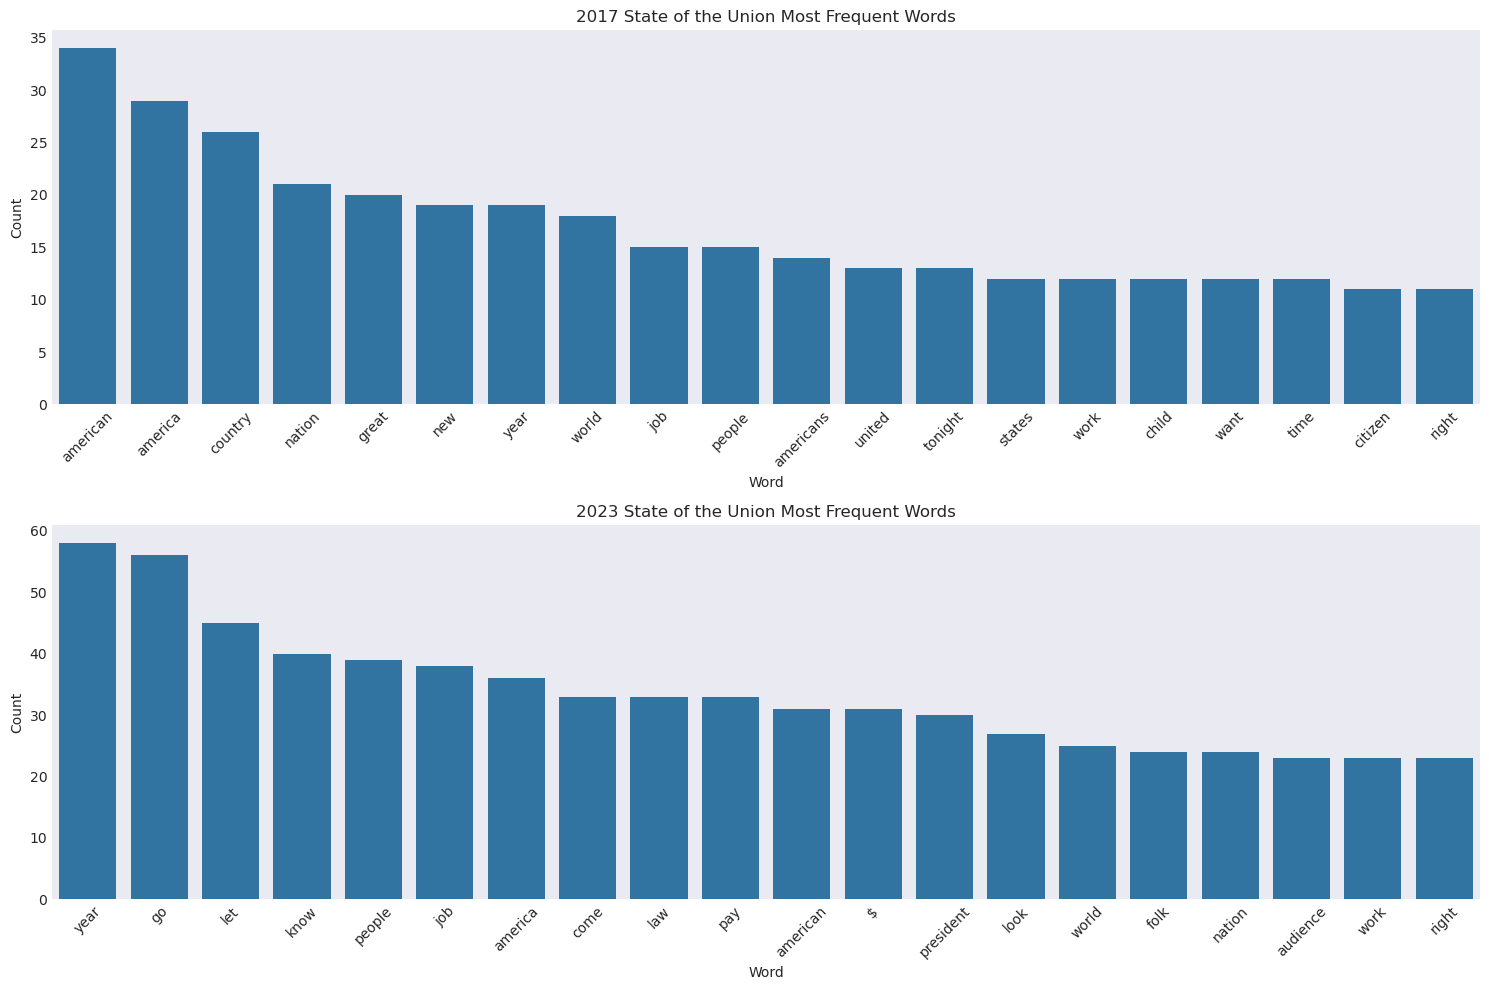

In [53]:
fig, axes = plt.subplots(2,1,figsize=(15, 10))

# 2017
sns.barplot(ax=axes[0], x = df_2017.Word,y = df_2017.Count)
axes[0].set_title("2017 State of the Union Most Frequent Words")
axes[0].tick_params(axis='x', rotation=45)

# 2023
sns.barplot(ax=axes[1], x = df_2023.Word,y = df_2023.Count)
axes[1].set_title("2023 State of the Union Most Frequent Words")
axes[1].tick_params(axis='x', rotation=45)

fig.tight_layout()

## Step 4
### TF-IDF Vectorization

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

#### Training the Vectorizer and Transform the Data


In [ ]:
# you may use this as input to fit the TF-IDF vectorizer
raw_docs = sou["Text"].to_list()